# 1. DNN s použitím Sequential modelu cez TensorFlow API


In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 


### načítanie CSV datasetu do dataframe

In [2]:
df = pd.read_csv('beta.csv')
df.head()


,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0


In [3]:
df.tail()


,#,title,user_rating,critic_rating,platform
1182,236,the grand tour game,70.0,52,3
1183,240,generation zero,60.0,50,3
1184,244,power rangers: battle for the grid,60.0,48,3
1185,246,monster jam steel titans,40.0,47,3
1186,248,wwe 2k20,11.0,45,3


### korelácia dát v datesete kvôli kontrole nadbytočných stĺpcov

In [4]:
df.corr()

,#,user_rating,critic_rating,platform
#,1.000000,-0.365363,-0.893220,-0.085543
user_rating,-0.365363,1.000000,0.451745,0.074972
critic_rating,-0.893220,0.451745,1.000000,0.028682
platform,-0.085543,0.074972,0.028682,1.000000


### vizualizácia korelácie

In [5]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (5,5))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df) 

### vizualizácia datasetu

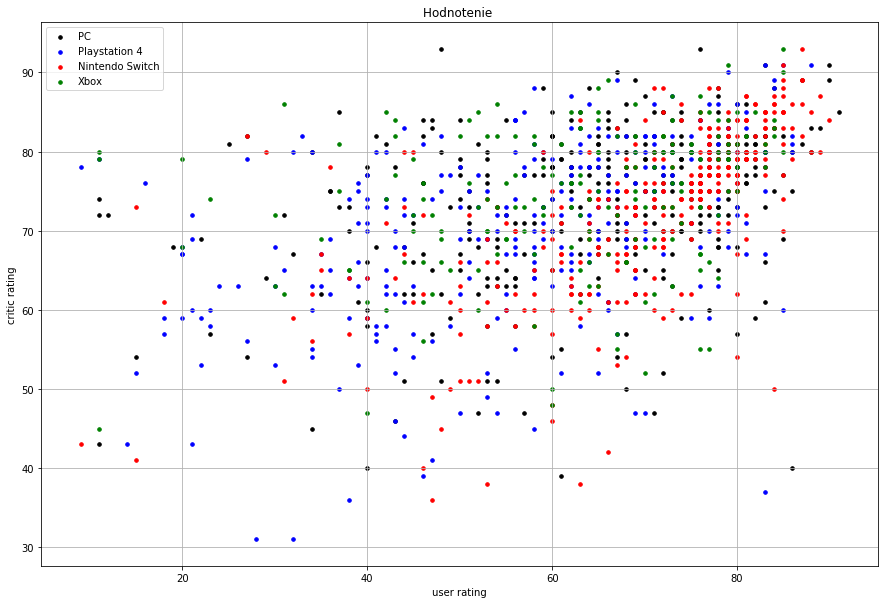

PC = 327 
Playstation 4  = 310 
Nintendo Switch = 364 
Xbox = 186 
Celkový počet hier v datasete = 1187 


In [6]:
# PC = 0
# PS4 = 1
# Nintendo Switch = 2
# Xbox = 3

x1 = np.array(df.drop(['title','#'],1))
y1 = np.array(df['platform'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0
plt.figure(figsize=(15,10))

for i in range(0,len(x1)):
    print
    if x1[i][2] == 0:
        a = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'black', marker = '.')
    elif x1[i][2]== 1:
        b = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'blue',marker = '.')
    elif x1[i][2]== 2:
        c = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'red',marker = '.')
    elif x1[i][2]== 3:
        d = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'green',marker = '.')             
        
    c1+=1



plt.xlabel("user rating")
plt.ylabel("critic rating")
plt.title("Hodnotenie ")
plt.legend((a,b,c,d),('PC','Playstation 4','Nintendo Switch','Xbox'))
plt.grid()

plt.show()

pc = len(df.loc[df['platform'] == 0])
ps4 = len(df.loc[df['platform'] == 1])
switch = len(df.loc[df['platform'] == 2])
xbox = len(df.loc[df['platform'] == 3])


print("PC = {} ".format(pc))
print("Playstation 4  = {} ".format(ps4))
print("Nintendo Switch = {} ".format(switch))
print("Xbox = {} ".format(xbox))
print("Celkový počet hier v datasete = {} ".format(len(df)))


### prevod dát do Numpy polí

In [7]:
# do X berieme stĺpce user_rating a critic_rating
x = np.array(df.drop(['platform', 'title','#'],1))

# ako Y nám bude slúžiť stĺpec platform
y = np.array(df['platform'], dtype ='float')  

y.shape = (len(y),1)  

x


array([[76., 93.],
       [48., 93.],
       [90., 91.],
       ...,
       [60., 48.],
       [40., 47.],
       [11., 45.]])

### rozdelenie dát na testovacie a trénovacie dáta 

In [8]:
#rozdelenie v pomere 7:3 ~ testovacie dáta 70%, trénovacie 30%
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.7)


### transformácia dát pre lepšie modelovanie

In [9]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

### použitie DNN modelu pre trénovacie dáta

In [16]:
#model Sequential
model = tf.keras.models.Sequential()
#vstupná vrstva
model.add(tf.keras.layers.Flatten())
#dve skryté vrstvy po 100 neurónoch s aktivačnou funkciou tanh
model.add(tf.keras.layers.Dense(100,activation = tf.nn.tanh))
model.add(tf.keras.layers.Dense(100,activation = tf.nn.tanh))
#výstupná vrstva so štyrmi neurónmi s aktivačnou funkciou softmax
model.add(tf.keras.layers.Dense(4,activation = tf.nn.softmax))

#kompilovanie modelu s optimizerom Adamax
model.compile(optimizer = tf.optimizers.Adamax(),
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])




### naplnenie dát do modelu

In [17]:
scores = model.fit(x_f_train, y_f_train, batch_size=100, epochs=100, validation_split=0.2)


Train on 284 samples, validate on 72 samples
Epoch 1/100
284/284 [==============================] - 1s 3ms/sample - loss: 1.4282 - accuracy: 0.2817 - val_loss: 1.3809 - val_accuracy: 0.3333
Epoch 2/100
284/284 [==============================] - 0s 154us/sample - loss: 1.3724 - accuracy: 0.3275 - val_loss: 1.3610 - val_accuracy: 0.3611
Epoch 3/100
284/284 [==============================] - 0s 141us/sample - loss: 1.3441 - accuracy: 0.3556 - val_loss: 1.3507 - val_accuracy: 0.3750
Epoch 4/100
284/284 [==============================] - 0s 138us/sample - loss: 1.3289 - accuracy: 0.3838 - val_loss: 1.3475 - val_accuracy: 0.3889
Epoch 5/100
284/284 [==============================] - 0s 106us/sample - loss: 1.3186 - accuracy: 0.3768 - val_loss: 1.3463 - val_accuracy: 0.3750
Epoch 6/100
284/284 [==============================] - 0s 143us/sample - loss: 1.3132 - accuracy: 0.3908 - val_loss: 1.3465 - val_accuracy: 0.3472
Epoch 7/100
284/284 [==============================] - 0s 117us/sample - lo

Epoch 56/100
284/284 [==============================] - 0s 115us/sample - loss: 1.2905 - accuracy: 0.4049 - val_loss: 1.3350 - val_accuracy: 0.3889
Epoch 57/100
284/284 [==============================] - 0s 89us/sample - loss: 1.2906 - accuracy: 0.3944 - val_loss: 1.3359 - val_accuracy: 0.3889
Epoch 58/100
284/284 [==============================] - 0s 159us/sample - loss: 1.2903 - accuracy: 0.3944 - val_loss: 1.3355 - val_accuracy: 0.4028
Epoch 59/100
284/284 [==============================] - 0s 149us/sample - loss: 1.2902 - accuracy: 0.3979 - val_loss: 1.3366 - val_accuracy: 0.4028
Epoch 60/100
284/284 [==============================] - 0s 141us/sample - loss: 1.2899 - accuracy: 0.3944 - val_loss: 1.3367 - val_accuracy: 0.4028
Epoch 61/100
284/284 [==============================] - 0s 171us/sample - loss: 1.2896 - accuracy: 0.3944 - val_loss: 1.3371 - val_accuracy: 0.3889
Epoch 62/100
284/284 [==============================] - 0s 98us/sample - loss: 1.2894 - accuracy: 0.4049 - val_lo

### validácia dát

In [18]:
model.summary()
print("Presnosť trénovania: %.2f%% / Chybovosť trénovania: %.2f%% "  %
      (100*scores.history['accuracy'][-1], 100*scores.history['loss'][-1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  300       
_________________________________________________________________
dense_13 (Dense)             multiple                  10100     
_________________________________________________________________
dense_14 (Dense)             multiple                  404       
Total params: 10,804
Trainable params: 10,804
Non-trainable params: 0
_________________________________________________________________
Presnosť trénovania: 41.55% / Chybovosť trénovania: 128.61% 


### vizualizácia presnosti a chybovosti

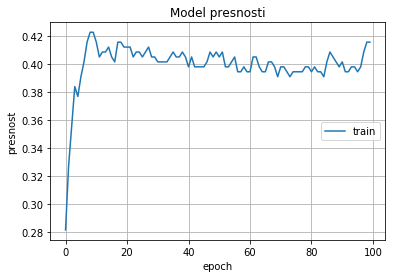

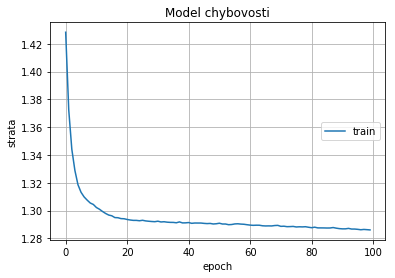

In [19]:
plt.plot(scores.history['accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()

plt.plot(scores.history['loss'])

plt.title('Model chybovosti')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()


# 2. DNN s použitím Sequential modelu cez Keras API


### načítanie datasetu

In [20]:
COLUMN_NAMES = ['#','title','user_rating','critic_rating','platform']

In [22]:
training_dataset = pd.read_csv('beta.csv', names = COLUMN_NAMES, header=0)
training_dataset[:10]


,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0
5,5,resident evil 2,90.0,89,0
6,6,devil may cry 5,87.0,89,0
7,7,slay the spire,69.0,89,0
8,8,asgard's wrath,84.0,88,0
9,9,sekiro: shadows die twice,78.0,88,0


### vstupné parametre

In [23]:
#x = user_rating, critic rating.. y = platform
train_x = training_dataset.iloc[:,2:4].values
train_y = training_dataset.iloc[:,4].values


In [24]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [25]:
kategoricka_premenna = np_utils.to_categorical(train_y)

In [26]:
kategoricka_premenna

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

### vytvorenie a kompilácia modelu

In [35]:
model2 = Sequential()
#vstupná vrstva s dvomi parametrami a s 100 neurónmi s aktivačnou funkciou sigmoid
model2.add(Dense(100, input_dim=2, activation='sigmoid'))
#skryté vrstva po 100 neurónoch s aktivačnou funkciou sigmoid
model2.add(Dense(100,activation='sigmoid'))
#výstupná vrstva so štyrmi neurónmi
model2.add(Dense(4))

#kompilovanie modelu pomocou optimizera Adamax
model2.compile(loss='mean_squared_error', optimizer='adamax',metrics=['accuracy'])


### naplnenie dát do modelu

In [30]:
scores2 = model2.fit(train_x, kategoricka_premenna, epochs = 100, validation_split=0.2)

Train on 949 samples, validate on 238 samples
Epoch 1/100
949/949 [==============================] - 1s 2ms/step - loss: 0.2561 - accuracy: 0.3762 - val_loss: 0.3085 - val_accuracy: 0.1807
Epoch 2/100
949/949 [==============================] - 0s 455us/step - loss: 0.1617 - accuracy: 0.4415 - val_loss: 0.3289 - val_accuracy: 0.0672
Epoch 3/100
949/949 [==============================] - 0s 487us/step - loss: 0.1573 - accuracy: 0.4647 - val_loss: 0.3164 - val_accuracy: 0.1092
Epoch 4/100
949/949 [==============================] - 0s 470us/step - loss: 0.1566 - accuracy: 0.4742 - val_loss: 0.3088 - val_accuracy: 0.0714
Epoch 5/100
949/949 [==============================] - 0s 411us/step - loss: 0.1579 - accuracy: 0.4626 - val_loss: 0.3102 - val_accuracy: 0.1429
Epoch 6/100
949/949 [==============================] - 0s 486us/step - loss: 0.1561 - accuracy: 0.4795 - val_loss: 0.3356 - val_accuracy: 0.0462
Epoch 7/100
949/949 [==============================] - 0s 468us/step - loss: 0.1580 - 

Epoch 56/100
949/949 [==============================] - 0s 455us/step - loss: 0.1574 - accuracy: 0.4763 - val_loss: 0.3475 - val_accuracy: 0.0210
Epoch 57/100
949/949 [==============================] - 0s 423us/step - loss: 0.1554 - accuracy: 0.4615 - val_loss: 0.3211 - val_accuracy: 0.0588
Epoch 58/100
949/949 [==============================] - 0s 381us/step - loss: 0.1564 - accuracy: 0.4805 - val_loss: 0.3156 - val_accuracy: 0.0756
Epoch 59/100
949/949 [==============================] - 0s 442us/step - loss: 0.1521 - accuracy: 0.4921 - val_loss: 0.3147 - val_accuracy: 0.0756
Epoch 60/100
949/949 [==============================] - 0s 385us/step - loss: 0.1553 - accuracy: 0.4910 - val_loss: 0.3335 - val_accuracy: 0.0042
Epoch 61/100
949/949 [==============================] - 0s 391us/step - loss: 0.1582 - accuracy: 0.4784 - val_loss: 0.3112 - val_accuracy: 0.0630
Epoch 62/100
949/949 [==============================] - 0s 429us/step - loss: 0.1559 - accuracy: 0.4742 - val_loss: 0.3434 -

### evaluácia modelu

In [31]:
 model2.evaluate(train_x, kategoricka_premenna)

1187/1187 [==============================] - 0s 202us/step


[0.1862722183840558, 0.4026958644390106]

### validácia modelu

In [36]:
model2.summary()
print("Presnosť trénovania: %.2f%% / Chybovosť trénovania: %.2f%% "  %
      (100*scores2.history['accuracy'][-1], 100*scores2.history['loss'][-1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 404       
Total params: 10,804
Trainable params: 10,804
Non-trainable params: 0
_________________________________________________________________
Presnosť trénovania: 49.63% / Chybovosť trénovania: 15.12% 


### vizualizácia presnosti a chybovosti

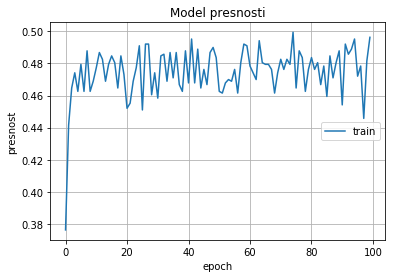

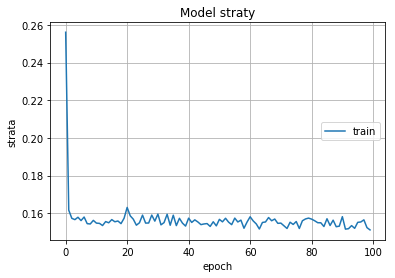

In [33]:
plt.plot(scores2.history['accuracy'])


plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()

plt.plot(scores2.history['loss'])


plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()

### porovnanie vizualizácie presnosti a chybovosti v oboch modeloch

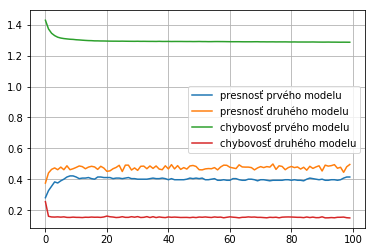

In [34]:
plt.plot(scores.history['accuracy'], label = 'presnosť prvého modelu')
plt.plot(scores2.history['accuracy'], label = 'presnosť druhého modelu')
plt.plot(scores.history['loss'], label = 'chybovosť prvého modelu')
plt.plot(scores2.history['loss'], label = 'chybovosť druhého modelu')
plt.grid()
plt.legend()